In [7]:
import OpenEXR
import Imath
import numpy as np

file_path="../pink-room/input/beauty_0.exr"
# 打开EXR文件
file = OpenEXR.InputFile(file_path)

# 获取文件头信息
header = file.header()

# 获取数据窗口
dw = header['dataWindow']
width = dw.max.x - dw.min.x + 1
height = dw.max.y - dw.min.y + 1

# 定义通道
channels = header['channels'].keys()

# 读取每个通道的数据
pixels = {channel: np.frombuffer(file.channel(channel), dtype=np.float32).reshape((height, width)) for channel in channels}

# 打印每个像素的值
# for y in range(height):
#     for x in range(width):
#         pixel_values = {channel: pixels[channel][y, x] for channel in channels}
#         print(f"Pixel ({x}, {y}): {pixel_values}")

ValueError: cannot reshape array of size 460800 into shape (720,1280)

In [2]:
print("pixels_B_max:{},pixels_B_min:{}".format(pixels['B'].max(),pixels['B'].min()))
print("pixels_G_max:{},pixels_G_min:{}".format(pixels['G'].max(),pixels['G'].min()))
print("pixels_R_max:{},pixels_R_min:{}".format(pixels['R'].max(),pixels['R'].min()))
# pixels['G'].max()
# pixels['R'].max()

pixels_B_max:2.0,pixels_B_min:0.0
pixels_G_max:2.0,pixels_G_min:0.0
pixels_R_max:2.0,pixels_R_min:0.0


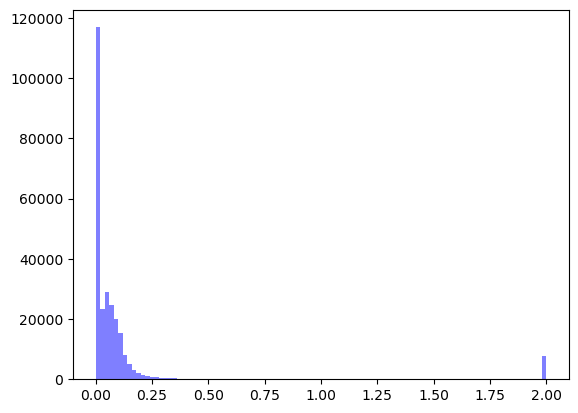

In [3]:
#打印pixels的hist分布
import matplotlib.pyplot as plt
plt.hist(pixels['B'].flatten(), bins=100, color='b', alpha=0.5, label='B')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


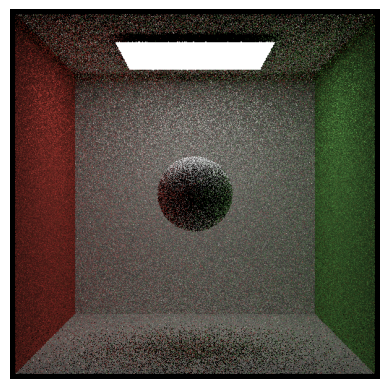

In [4]:
#显示filepath所对应的.exr文件并将其解析为图片并显示出来
import OpenEXR
import Imath
import numpy as np
import imageio
import matplotlib.pyplot as plt

def read_exr(file_path):
    # 打开EXR文件
    exr_file = OpenEXR.InputFile(file_path)
    
    # 获取文件头信息
    header = exr_file.header()
    
    # 获取数据窗口
    dw = header['dataWindow']
    width = dw.max.x - dw.min.x + 1
    height = dw.max.y - dw.min.y + 1
    
    # 定义通道
    channels = ['R', 'G', 'B']
    
    # 读取每个通道的数据
    data = {channel: np.frombuffer(exr_file.channel(channel), dtype=np.float32) for channel in channels}
    
    # 将数据重塑为图像格式
    img = np.zeros((height, width, len(channels)), dtype=np.float32)
    for i, channel in enumerate(channels):
        img[:, :, i] = np.reshape(data[channel], (height, width))
    
    return img

# 读取并显示EXR文件
# file_path = 'input/ID_0.exr'
image = read_exr(file_path)
#对图片进行gamma校正
image = np.power(image, 1/2.2)
plt.imshow(image)
plt.axis('off')  # 关闭坐标轴
plt.show()
